## Intro

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [37]:
df = pd.read_csv('cathy/data/title_budgets_ratings_v3.csv', index_col = 0)

In [39]:
df.head()

,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit_multiple
0,1,2009-12-18,Avatar,tt1775309,Avatar,Abatâ,2011,93.0,Horror,6.1,43,2009,12,425000000,760507625,2776345279,['Horror'],5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,2011,5,410600000,241063875,1045663875,"['Action', 'Adventure', 'Fantasy']",1.546673
2,3,2019-06-07,Dark Phoenix,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451,2019,6,350000000,42762350,149762350,"['Action', 'Adventure', 'Sci-Fi']",-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,2015,5,330600000,459005868,1403013963,"['Action', 'Adventure', 'Sci-Fi']",3.243841
4,7,2018-04-27,Avengers: Infinity War,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,2018,4,300000000,678815482,2048134200,"['Action', 'Adventure', 'Sci-Fi']",5.827114


In [40]:
df.shape

(2943, 18)

In [41]:
# Distribution of start_years.
df.start_year.value_counts()

2014    384
2015    365
2013    347
2011    336
2010    319
2012    317
2016    316
2017    251
2018    229
2019     79
Name: start_year, dtype: int64

## profitability X rating
First, we investigate if high rating correlates with high profitability for 2943 movies that have gross box office and budget data. 

Our profitability is defined as:
$Profitability multiple = \dfrac{(worldwide gross - production budget)}{production budget}$

In [42]:
df.isna().sum()

id                       0
release_date             0
movie                    0
tconst                   0
primary_title            0
original_title           0
start_year               0
runtime_minutes        121
genres                   8
averagerating            0
numvotes                 0
year                     0
month                    0
production_budget_2      0
domestic_gross_2         0
worldwide_gross_2        0
genres2                  8
profit_multiple          0
dtype: int64

In [8]:
# We won't drop rows with null in 'runtime_minutes' because 
# some big productions, such as Titanic, are missing value.
df.loc[df['movie']== 'Titanic']

,id,release_date,movie,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year,month,production_budget_2,domestic_gross_2,worldwide_gross_2,genres2,profit_multiple
32,43,1997-12-19,Titanic,tt2495766,Titanic,Titanic,2012,NaN,Adventure,6.2,20,1997,12,200000000,659363944,2208208395,['Adventure'],10.041042


In [9]:
# Drop the 282 productions where worldwide gross revenue is zero.
df = df[df['worldwide_gross_2']!=0]

# Drop 43 productions that have profit multiple over 30.
df = df[df['profit_multiple']<= 30]

In [10]:
df.shape

(2618, 18)

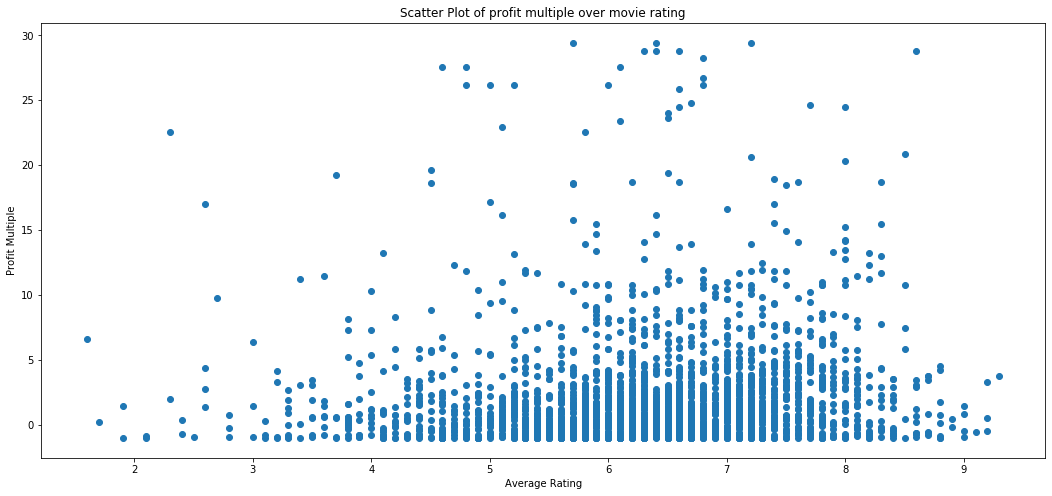

In [11]:
fig = plt.figure(figsize = (18,8))
plt.scatter(df['averagerating'], df['profit_multiple'])
plt.title('Scatter Plot of profit multiple over movie rating')
plt.xlabel('Average Rating')
plt.ylabel('Profit Multiple')
plt.show()

## Gross revenue and profitability by movie genre


In [12]:
# Split genre strings as list of genres. 
df['genres3'] = list(df['genres'].str.split(','))

In [13]:
# Drop the 8 movies where genres are null.
df = df.dropna(subset = ['genres3'])

In [14]:
df.shape

(2610, 19)

In [15]:
# define function get_genres that takes df and returns avg_revenue, avg_profit, avg_budget for a given genre. 

def get_genres(df, genre):
    revenue_list = []
    profit_list = []
    budget_list = []
    for i in range(len(df)):
        if genre in df['genres3'].iloc[i]:
            revenue_list.append(df['worldwide_gross_2'].iloc[i])
            profit_list.append(df['profit_multiple'].iloc[i])
            budget_list.append(df['production_budget_2'].iloc[i])
    avg_revenue = round(sum(revenue_list)/len(revenue_list),2)
    avg_profit = round(sum(profit_list)/len(profit_list),2)
    avg_budget = round(sum(budget_list)/len(budget_list),2)
    return avg_revenue, avg_profit, avg_budget, genre

In [16]:
# Do a test for genre type 'Action'.
test = list(get_genres(df,'Action'))
test

[203026877.28, 1.8, 69723282.57, 'Action']

In [17]:
# create a list of unique genres.
genres_unique =[]
for i in range(len(df)):
    for n in range(len(df['genres3'].iloc[i])):
        if df['genres3'].iloc[i][n] not in genres_unique:
            genres_unique.append(df['genres3'].iloc[i][n])
genres_unique

['Horror',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Western',
 'Animation',
 'Comedy',
 'Family',
 'Crime',
 'Drama',
 'Musical',
 'Romance',
 'Mystery',
 'Documentary',
 'Biography',
 'History',
 'Sport',
 'War',
 'Music',
 'News']

In [18]:
# We make a new DataFrame, df_genre, to store all genre types and their revenue and profit multiples. 
genres_list = []
for i in genres_unique:
    genres_list.append(list(get_genres(df,i)))
df_genre = pd.DataFrame(genres_list, columns=['revenue', 'profit', 'budget', 'genre'])

In [19]:
# Look at the new DataFrame.

df_genre

,revenue,profit,budget,genre
0,7.414387e+07,3.95,21836018.40,Horror
1,2.030269e+08,1.80,69723282.57,Action
2,3.121947e+08,2.06,95346204.84,Adventure
3,2.253270e+08,2.49,73848502.99,Fantasy
4,2.690445e+08,2.30,76636590.23,Sci-Fi
5,9.150416e+07,2.52,31829879.71,Thriller
6,9.381950e+07,0.52,50414285.71,Western
7,3.281689e+08,2.52,89474218.75,Animation
8,1.151357e+08,2.18,36458739.80,Comedy
9,1.734268e+08,2.04,56369548.87,Family


In [20]:
# set genre as index: 
df_genre = df_genre.set_index('genre')

In [21]:
# Sort genres by average revenue.
df_genre_rev = df_genre.sort_values(by=['revenue'], ascending = False)['revenue']

In [22]:
# Convert revenue unit to millions. 
df_genre_rev = df_genre_rev/1000000 

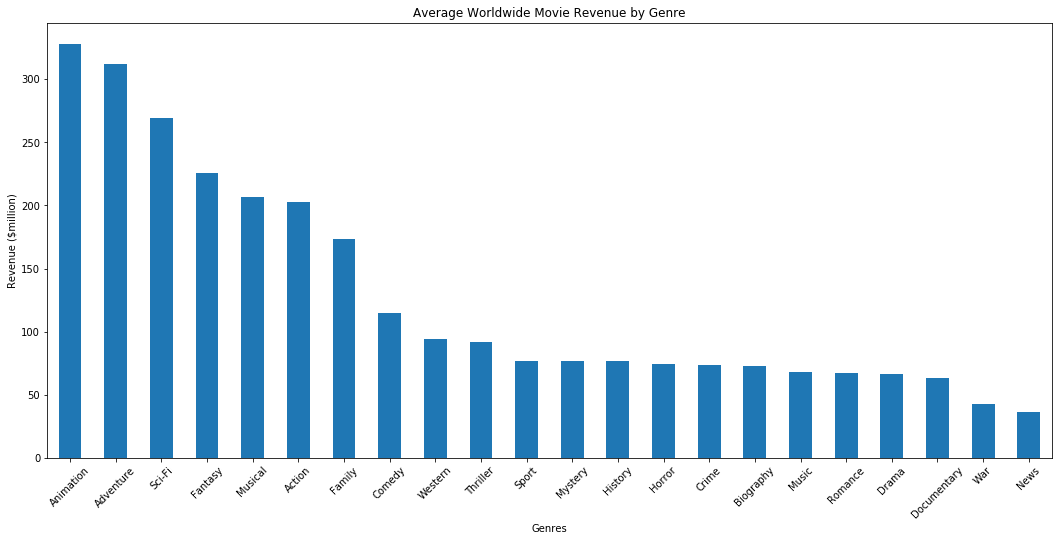

In [23]:
# Plot revenue by genre in descending order: 
plt.figure(figsize = (18,8))
df_genre_rev.plot.bar(rot=45)
plt.title('Average Worldwide Movie Revenue by Genre')
plt.xlabel('Genres')
plt.ylabel('Revenue ($million)')
plt.show()

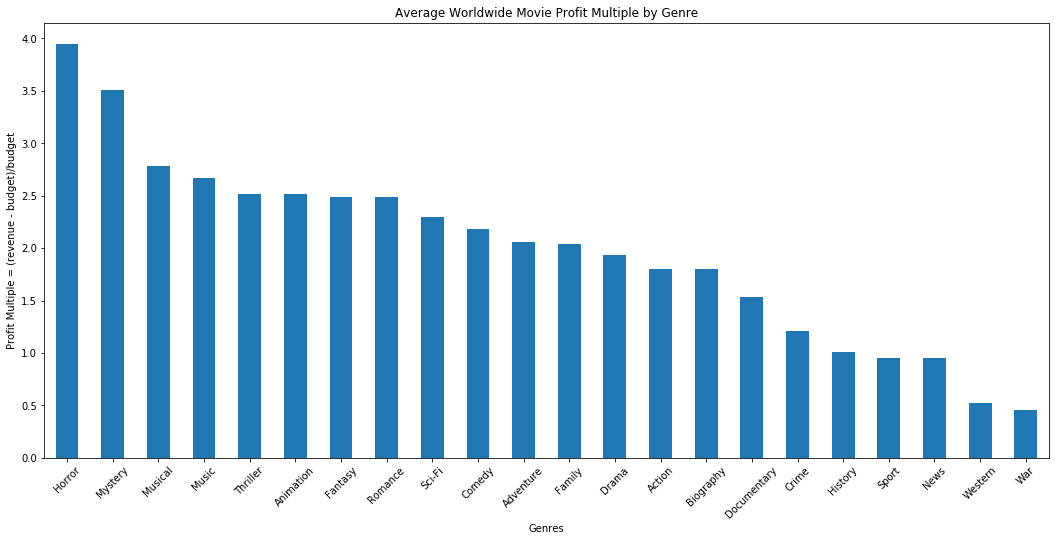

In [24]:
# Plot bar charts for profitability and average budget: 
df_genre_profit = df_genre.sort_values(by=['profit'], ascending = False)['profit']

plt.figure(figsize = (18,8))
df_genre_profit.plot.bar(rot=45)
plt.title('Average Worldwide Movie Profit Multiple by Genre')
plt.xlabel('Genres')
plt.ylabel('Profit Multiple = (revenue - budget)/budget')
plt.show()

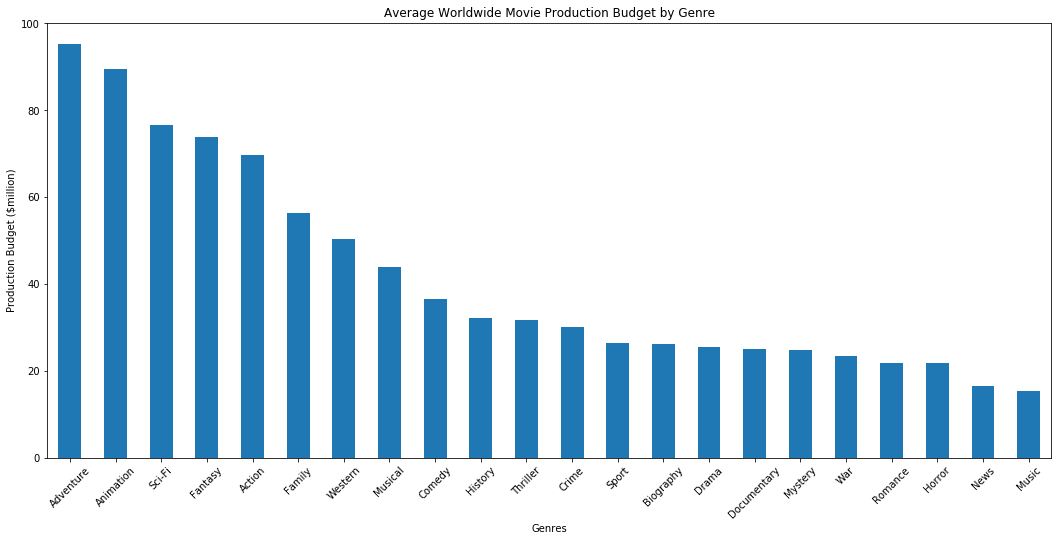

In [25]:
df_genre_budget = df_genre.sort_values(by=['budget'], ascending = False)['budget']
df_genre_budget = df_genre_budget/1000000

plt.figure(figsize = (18,8))
df_genre_budget.plot.bar(rot=45)
plt.title('Average Worldwide Movie Production Budget by Genre')
plt.xlabel('Genres')
plt.ylabel('Production Budget ($million)')
plt.show()

## Closer look at Profit and Revenue trends of top-performing genres
Horror genre stood out as having one of the lowest budgets on average while scoring the top profit multiple! We take a closer look at Horror movies' profitability trends over years, and compare it to all other genres. 

In [26]:
# First we break out each genre into separate rows. This gives us 5930 rows to work with. 
df2 = df.explode('genres3')
df2.shape

(5930, 19)

In [27]:
# Calculate the average profit multiple by genre and year, save in df3.
df3 = df2.groupby(['genres3','start_year'])['profit_multiple'].mean()

In [28]:
# Exclude Horror genre and save in df4. 
df4 = df3.reset_index(level=['genres3','start_year'])
df4 = df4[df4['genres3'] != 'Horror']
df4

,genres3,start_year,profit_multiple
0,Action,2010,1.483806
1,Action,2011,2.299466
2,Action,2012,1.849022
3,Action,2013,1.349947
4,Action,2014,2.334794
...,...,...,...
200,Western,2014,-0.096994
201,Western,2015,-0.849146
202,Western,2016,0.805835
203,Western,2018,-0.947879


In [29]:
df4.genres3.value_counts()

Music          10
Drama          10
Fantasy        10
War            10
Animation      10
Family         10
Crime          10
Comedy         10
Adventure      10
Documentary    10
History        10
Sci-Fi         10
Mystery        10
Thriller       10
Romance        10
Biography      10
Action         10
Western         9
Sport           8
Musical         6
News            2
Name: genres3, dtype: int64

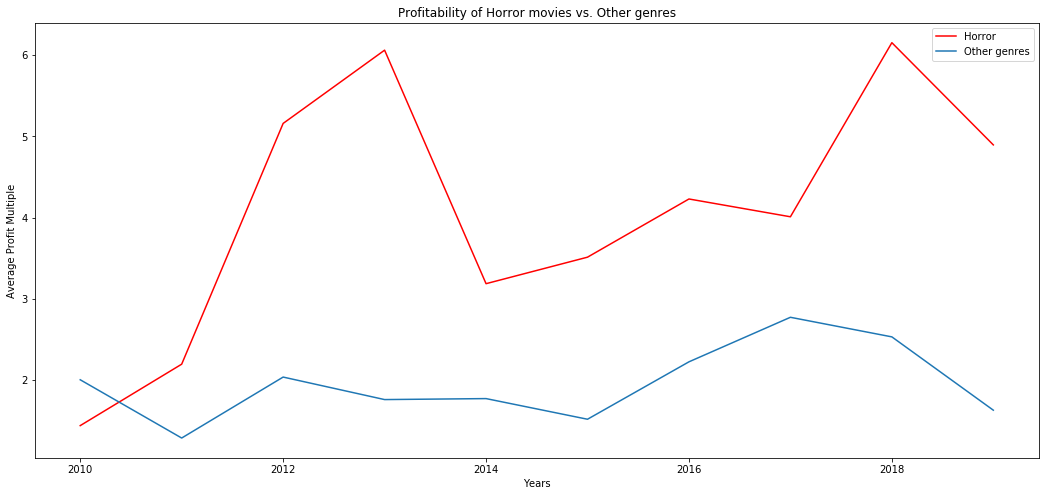

In [30]:
# Then we plot the average profit multiple for Horror movies vs. all other genre types over time
df4 = df3.reset_index(level=['genres3','start_year'])
df4 = df4[df4['genres3'] != 'Horror']

plt.figure(figsize = (18,8))
plt.plot(df3.Horror, color = 'red', label = 'Horror')
plt.plot(df4.groupby(['start_year'])['profit_multiple'].mean(), label = 'Other genres')
plt.title('Profitability of Horror movies vs. Other genres')
plt.xlabel('Years')
plt.ylabel('Average Profit Multiple')
plt.legend()
plt.show()

We also look at the top revenue-generating genre, Adventure, and compare its average revenue to all other genres. 

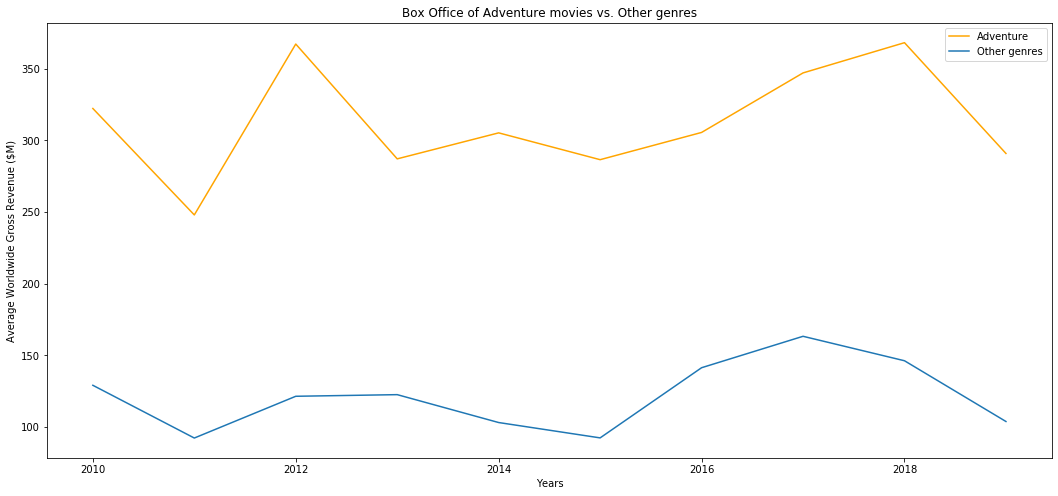

In [31]:
# Plot the average revenue of Action movies vs. all other genres over years. 

# Calculate the average revenue by genre and year, save in df5.
df5 = df2.groupby(['genres3','start_year'])['worldwide_gross_2'].mean()

df6 = df5.reset_index(level=['genres3','start_year'])
df6 = df6[(df6['genres3'] != 'Adventure')]

plt.figure(figsize = (18,8))
plt.plot(df5['Adventure']/1000000, color = 'orange', label = 'Adventure')
plt.plot(df6.groupby(['start_year'])['worldwide_gross_2'].mean()/1000000, label = 'Other genres')
plt.title('Box Office of Adventure movies vs. Other genres')
plt.xlabel('Years')
plt.ylabel('Average Worldwide Gross Revenue ($M)')
plt.legend()
plt.show()

In [32]:
import mysql.connector

con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')

df7 = pd.read_sql_query("""
SELECT primary_title, runtime_minutes, genres, averagerating, 
numvotes, ordering, category, job, characters, id, release_date, 
production_budget, domestic_gross, worldwide_gross, primary_name
FROM imdb_title_basics ba
JOIN imdb_title_ratings r ON ba.tconst = r.tconst
JOIN imdb_title_principals p ON p.tconst = ba.tconst
JOIN imdb_name_basics na ON na.nconst = p.nconst
LEFT JOIN movies.tn_movie_budgets bud ON bud.movie = ba.primary_title
""", con)

In [34]:
df7.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,ordering,category,job,characters,id,release_date,production_budget,domestic_gross,worldwide_gross,primary_name
0,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,10,composer,,,NaN,None,None,None,None,Naushad
1,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,1,actor,,"[""Kundan S. Prasad"",""Bajrangi""]",NaN,None,None,None,None,Dilip Kumar
2,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,2,actress,,"[""Munni"",""Laila-E-Aasmaan""]",NaN,None,None,None,None,Vyjayanthimala
3,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,3,actor,,"[""Ganeshi N. Prasad""]",NaN,None,None,None,None,Balraj Sahni
4,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,4,actor,,"[""Dwarka N. Prasad""]",NaN,None,None,None,None,Sanjeev Kumar
